# 3. TrainPredict_LSTM0
## Result:
- Kaggle score: 0.99270

## Tensorboard:
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

## Reference:
- https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis


## Run name

In [2]:
import time

project_name = 'ic_furniture2018'
step_name = 'TrainPredict_LSTM0'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

run_name: ic_furniture2018_TrainPredict_LSTM0_20180416_134642


## Import PKGs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import display

import os
import gc
import zipfile
import pickle
import math
import pdb
from PIL import Image
import shutil

from tqdm import tqdm
import multiprocessing

## Project folders

In [3]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('feature_folder: \t\t%s' % feature_folder)
print('post_pca_feature_folder: \t%s' % post_pca_feature_folder)
print('log_folder: \t\t\t%s' % log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_val_folder = os.path.join(input_folder, 'org_val')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

train_json_file = os.path.join(input_folder, 'train.json')
val_json_file = os.path.join(input_folder, 'validation.json')
test_json_file = os.path.join(input_folder, 'test.json')
print('\ntrain_json_file: \t\t%s' % train_json_file)
print('val_json_file: \t\t\t%s' % val_json_file)
print('test_json_file: \t\t%s' % test_json_file)

train_csv_file = os.path.join(input_folder, 'train.csv')
val_csv_file = os.path.join(input_folder, 'validation.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('val_csv_file: \t\t\t%s' % val_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)

sample_submission_csv_file = os.path.join(input_folder, 'sample_submission_randomlabel.csv')
print('\nsample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input
output_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/output
model_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/model
feature_folder: 		/data1/kaggle/imaterialist-challenge-furniture-2018/feature
post_pca_feature_folder: 	/data1/kaggle/imaterialist-challenge-furniture-2018/post_pca_feature
log_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/log

train_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.json
val_json_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.json
test_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.json

train_csv_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.csv
val_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.csv
test_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.csv


## Preview data

In [4]:
train_csv = pd.read_csv(train_csv_file)
print('train_csv.shape is {0}.'.format(train_csv.shape))
display(train_csv.head(2))

val_csv = pd.read_csv(val_csv_file)
print('val_csv.shape is {0}.'.format(val_csv.shape))
display(val_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

sample_submission_csv = pd.read_csv(sample_submission_csv_file)
print('sample_submission_csv.shape is {0}.'.format(sample_submission_csv.shape))
display(sample_submission_csv.head(2))

train_csv.shape is (194828, 3).


,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...


val_csv.shape is (6400, 3).


,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


sample_submission_csv.shape is (12800, 2).


,id,predicted
0,1,57
1,2,74


In [5]:
train_id = train_csv['image_id']
train_label_id = train_csv['label_id']

id_2_train_label_id_dict = dict(zip(train_id, train_label_id))
print('len(id_2_train_label_id_dict)=%d' % len(id_2_train_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))

image_file = '%s_%s.jpg' % (train_id[index], id_2_train_label_id_dict[train_id[index]])
print(image_file)

len(id_2_train_label_id_dict)=194828
id: 1, 	landmark_id:5
id: 2, 	landmark_id:5
2_5.jpg


In [6]:
val_id = val_csv['image_id']
val_label_id = val_csv['label_id']

id_2_val_label_id_dict = dict(zip(val_id, val_label_id))
print('len(id_2_val_label_id_dict)=%d' % len(id_2_val_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))

image_file = '%s_%s.jpg' % (val_id[index], id_2_val_label_id_dict[val_id[index]])
print(image_file)

len(id_2_val_label_id_dict)=6400
id: 1, 	landmark_id:38
id: 2, 	landmark_id:63
2_63.jpg


In [7]:
test_id = test_csv['image_id']

index = 0
print('id: %s' % (test_id[index]))
index = 1
print('id: %s' % (test_id[index]))

image_file = '%s.jpg' % (test_id[index])
print(image_file)

id: 1
id: 2
2.jpg


## Load feature

In [8]:
%%time
import h5py
import numpy as np
np.random.seed(2018)


def load_h5_data(data_str, feature_folder, file_reg, model_name, time_str):
    x_data = {}
    y_data = {}
    
    feature_model = os.path.join(feature_folder, file_reg % (model_name, time_str))
    for filename in [feature_model]:
        with h5py.File(filename, 'r') as h:
            x_data = np.array(h[data_str])
            y_data = np.array(h['%s_labels' % data_str])
    return x_data, y_data

def load_h5_test(feature_folder, file_reg, model_name, time_str):
    x_test = {}
    
    feature_model = os.path.join(feature_folder, file_reg % (model_name, time_str))
    for filename in [feature_model]:
        with h5py.File(filename, 'r') as h:
            x_test = np.array(h['test'])
    return x_test

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 51.2 ms


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
def is_files_existed(feature_folder, file_reg, model_names, time_strs):
    for model_name in model_names:
        for time_str in time_strs:
            file_name = file_reg % (model_name, time_str)
            file_path = os.path.join(feature_folder, file_name)
            if not os.path.exists(file_path):
                print('File not existed: %s' % file_path)
                return False
            else:
                print('File existed: %s' % file_path)
    return True

# Test
file_reg = 'feature_%s_%s.h5'
model_names = ['MobileNet', 
               'VGG16',
               'VGG19',
               'ResNet50',
               'DenseNet121',
               'DenseNet169',
               'DenseNet201',
               'Xception', 
               'InceptionV3', 
               'InceptionResNetV2']
time_strs = ['20180331-163122']

print(is_files_existed(feature_folder, file_reg, model_names, time_strs))


def time_str_generator(time_strs):
    while(1):
        for time_str in time_strs:
            print('  ' + time_str)
            yield time_str
            
# Test
time_str_gen = time_str_generator(time_strs)
for i in range(10):
    next(time_str_gen)

File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_MobileNet_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG16_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG19_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_ResNet50_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet121_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet169_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet201_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_InceptionV3_20180331-163122.h5
Fil

In [10]:
%%time
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

def load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, time_str):
    x_data_time_strs = []
    y_data_time_strs = None
    for model_name in model_names:
        x_data_time_str, y_data_time_str = load_h5_data(data_str, feature_folder, file_reg, model_name, time_str)

        x_data_time_strs.append(x_data_time_str)
        y_data_time_strs = y_data_time_str
    
    # Get max dimension
    max_dim = 0
    for data in x_data_time_strs:
        data_dim = data.shape[-1]
#         print('data_dim=%s' % data_dim)
        if max_dim < data_dim:
            max_dim = data_dim
#     print('max_dim=%s' % max_dim)
    
    # Align to max dimension
    for i, data in enumerate(x_data_time_strs):
        data_dim = data.shape[-1]
#         print(data.shape)
#         print('data_dim=%s' % data_dim)
        
        if data_dim < max_dim:
            new_datas = []
            end_dim = 0
            for j in range(int(max_dim/data_dim) + 1):
                end_dim += data_dim
#                 print('end_dim=%s' % end_dim)
#                 pdb.set_trace()
                if end_dim <= max_dim:
#                     print(0, data_dim)
                    temp = np.array(data[:, 0: data_dim], copy=True)
                else:
#                     print(0, end_dim - max_dim)
                    temp = np.array(data[:, 0: (max_dim - (end_dim - data_dim))], copy=True)
#                 print(temp.shape)
                    
#                     pdb.set_trace()
                new_datas.append(temp)
#             pdb.set_trace()
            x_data_time_strs[i] = np.concatenate(new_datas, axis=-1)
#             print(x_data_time_strs[i].shape)
#             print('*'*20)
        x_data_time_strs[i] = x_data_time_strs[i][:, np.newaxis, :]
#         print(x_data_time_strs[i].shape)
#         print('*'*40)
    x_data_time_strs = np.concatenate(x_data_time_strs, axis=1)
#     print(x_data_time_strs.shape)
#     print(y_data_time_strs.shape)
#     print('*'*40)
    return x_data_time_strs, y_data_time_strs

def data_generator_folder(data_str, feature_folder, file_reg, model_names, time_strs, batch_size, num_classes):
    assert is_files_existed(feature_folder, file_reg, model_names, time_strs)

    time_str_gen = time_str_generator(time_strs)
    x_data, y_data = load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, next(time_str_gen))
    len_x_data = len(x_data)
    start_index = 0
    end_index = 0
    while(1):
        end_index = start_index + batch_size
        if end_index < len_x_data:
#             print(start_index, end_index, end=' ')
            x_batch = x_data[start_index: end_index, :]
            y_batch = y_data[start_index: end_index]
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = start_index + batch_size
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat
        else:
            end_index = end_index-len_x_data
#             print(start_index, end_index, end=' ')
            x_data_old = np.array(x_data[start_index:, :], copy=True)
            y_data_old = np.array(y_data[start_index:], copy=True)
            # Load new datas
            x_data, y_data = load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, next(time_str_gen))
            x_data, y_data = shuffle(x_data, y_data, random_state=2018)
            len_x_data = len(x_data)
            gc.collect()
            x_batch = np.vstack((x_data_old, x_data[:end_index, :]))
            y_batch = np.concatenate([y_data_old, y_data[:end_index]])
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = end_index
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat
        
    
# x_train = np.concatenate([x_train_Xception, x_train_InceptionV3, x_train_InceptionResNetV2], axis=-1)

num_classes = len(list(set(train_label_id)))
print('num_classes: %s' % num_classes)

file_reg = 'feature_%s_%s.h5'
model_names = [
    'MobileNet', 
    'VGG16',
    'VGG19',
    'ResNet50',
    'DenseNet121',
    'DenseNet169',
    'DenseNet201',
    'Xception',
    'InceptionV3',
    'InceptionResNetV2'
]

time_strs = ['20180331-163122']


batch_size = 128
print('*' * 60)
timesteps = len(model_names)
len_train_csv = train_csv.shape[0]
steps_per_epoch_train = int(len_train_csv/batch_size) - 2
print('timesteps: %s' % timesteps)
print('len(train_data): %s' % len_train_csv)
print('batch_size: %s' % batch_size)
print('steps_per_epoch_train: %s' % steps_per_epoch_train)

train_gen = data_generator_folder('train', feature_folder, file_reg, model_names, time_strs, batch_size, num_classes)
batch_data = next(train_gen)
print(batch_data[0].shape, batch_data[1].shape)
batch_data = next(train_gen)
print(batch_data[0].shape, batch_data[1].shape)
# for i in range(steps_per_epoch_train*5):
#     next(train_gen)

print('*' * 60)
len_val_csv = val_csv.shape[0]
steps_per_epoch_val = int(len_val_csv/batch_size)
print('len(val_data): %s' % len_val_csv)
print('batch_size: %s' % batch_size)
print('steps_per_epoch_val: %s' % steps_per_epoch_val)
val_gen = data_generator_folder('val', feature_folder, file_reg, model_names, time_strs, batch_size, num_classes)
batch_data = next(val_gen)
print(batch_data[0].shape, batch_data[1].shape)
batch_data = next(val_gen)
print(batch_data[0].shape, batch_data[1].shape)

print('*' * 80)
data_dim = batch_data[0].shape[-1]
print('data_dim: %s' % data_dim)

Using TensorFlow backend.


num_classes: 128
************************************************************
timesteps: 10
len(train_data): 194828
batch_size: 128
steps_per_epoch_train: 1520
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_MobileNet_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG16_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG19_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_ResNet50_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet121_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet169_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet201_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/

In [22]:
%%time
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

def load_time_str_feature_test(feature_folder, file_reg, model_names, time_str):
    x_test_time_strs = []
    for model_name in model_names:
        x_test_time_str = load_h5_test(feature_folder, file_reg, model_name, time_str)

        x_test_time_strs.append(x_test_time_str)
    
    # Get max dimension
    max_dim = 0
    for test in x_test_time_strs:
        test_dim = test.shape[-1]
#         print('test_dim=%s' % test_dim)
        if max_dim < test_dim:
            max_dim = test_dim
#     print('max_dim=%s' % max_dim)
    
    # Align to max dimension
    for i, test in enumerate(x_test_time_strs):
        test_dim = test.shape[-1]
#         print(test.shape)
#         print('test_dim=%s' % test_dim)
        
        if test_dim < max_dim:
            new_tests = []
            end_dim = 0
            for j in range(int(max_dim/test_dim) + 1):
                end_dim += test_dim
#                 print('end_dim=%s' % end_dim)
#                 pdb.set_trace()
                if end_dim <= max_dim:
#                     print(0, test_dim)
                    temp = np.array(test[:, 0: test_dim], copy=True)
                else:
#                     print(0, end_dim - max_dim)
                    temp = np.array(test[:, 0: (max_dim - (end_dim - test_dim))], copy=True)
#                 print(temp.shape)
                    
#                     pdb.set_trace()
                new_tests.append(temp)
#             pdb.set_trace()
            x_test_time_strs[i] = np.concatenate(new_tests, axis=-1)
#             print(x_test_time_strs[i].shape)
#             print('*'*20)
        x_test_time_strs[i] = x_test_time_strs[i][:, np.newaxis, :]
#         print(x_test_time_strs[i].shape)
#         print('*'*40)
    x_test_time_strs = np.concatenate(x_test_time_strs, axis=1)
#     print(x_test_time_strs.shape)
#     print('*'*40)
    return x_test_time_strs

def test_generator_folder(feature_folder, file_reg, model_names, time_strs, batch_size, num_classes):
    assert is_files_existed(feature_folder, file_reg, model_names, time_strs)

    time_str_gen = time_str_generator(time_strs)
    x_test = load_time_str_feature_test(feature_folder, file_reg, model_names, next(time_str_gen))
    len_x_test = len(x_test)
    start_index = 0
    end_index = 0
    while(1):
        end_index = start_index + batch_size
        if end_index < len_x_test:
#             print(start_index, end_index, end=' ')
            x_batch = x_test[start_index: end_index, :]
            
            start_index = start_index + batch_size
#             print(x_batch.shape)
            yield x_batch
        else:
            end_index = end_index-len_x_test
#             print(start_index, end_index, end=' ')
            x_test_old = np.array(x_test[start_index:, :], copy=True)
            # Load new tests
            x_test = load_time_str_feature_test(feature_folder, file_reg, model_names, next(time_str_gen))
            len_x_test = len(x_test)
            gc.collect()
            x_batch = np.vstack((x_test_old, x_test[:end_index, :]))
            
            start_index = end_index
#             print(x_batch.shape)
            yield x_batch
        

print('*' * 60)
len_test_csv = test_csv.shape[0]
steps_per_epoch_test = int(len_test_csv/batch_size) - 1
print('len(test_test): %s' % len_test_csv)
print('batch_size: %s' % batch_size)
print('steps_per_epoch_test: %s' % steps_per_epoch_test)

test_gen = test_generator_folder(feature_folder, file_reg, model_names, time_strs, batch_size, num_classes)
batch_test = next(test_gen)
print(batch_test[0].shape, batch_test[1].shape)
batch_test = next(test_gen)
print(batch_test[0].shape, batch_test[1].shape)


x_test = load_time_str_feature_test(feature_folder, file_reg, model_names, time_strs[0])
print(x_test.shape)

************************************************************
len(test_test): 12800
batch_size: 128
steps_per_epoch_test: 99
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_MobileNet_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG16_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_VGG19_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_ResNet50_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet121_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet169_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_DenseNet201_20180331-163122.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_20180331-16

## Build NN

In [12]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

In [13]:
def get_lr(x):
    lr = round(1e-4 * 0.96 ** x, 6)
    if lr < 1e-5:
        lr = 1e-5
    print(lr, end='  ')
    return lr

for i in range(30):
    print(get_lr(i), end=' ')
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
annealer = LearningRateScheduler(get_lr)


log_dir = os.path.join(log_folder, run_name)
print('\nlog_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

0.0001  0.0001 9.6e-05  9.6e-05 9.2e-05  9.2e-05 8.8e-05  8.8e-05 8.5e-05  8.5e-05 8.2e-05  8.2e-05 7.8e-05  7.8e-05 7.5e-05  7.5e-05 7.2e-05  7.2e-05 6.9e-05  6.9e-05 6.6e-05  6.6e-05 6.4e-05  6.4e-05 6.1e-05  6.1e-05 5.9e-05  5.9e-05 5.6e-05  5.6e-05 5.4e-05  5.4e-05 5.2e-05  5.2e-05 5e-05  5e-05 4.8e-05  4.8e-05 4.6e-05  4.6e-05 4.4e-05  4.4e-05 4.2e-05  4.2e-05 4.1e-05  4.1e-05 3.9e-05  3.9e-05 3.8e-05  3.8e-05 3.6e-05  3.6e-05 3.5e-05  3.5e-05 3.3e-05  3.3e-05 3.2e-05  3.2e-05 3.1e-05  3.1e-05 
log_dir:/data1/kaggle/imaterialist-challenge-furniture-2018/log/ic_furniture2018_Train-Predict_Mix10model_20180401_102538


In [14]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(Bidirectional(LSTM(1024, return_sequences=True), input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(512, return_sequences=True)))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(512, return_sequences=True)))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(512, return_sequences=True)))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(512)))  # return a single vector of dimension 32
model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 10, 2048)          25174016  
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 2048)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 1024)          10489856  
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 1024)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10, 1024)          6295552   
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 1024)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 1024)          6295552   
__________

In [15]:
%%time
hist = model.fit_generator(train_gen,
    steps_per_epoch=steps_per_epoch_train,
    epochs=30, #Increase this when not on Kaggle kernel
    verbose=1,  #1 for ETA, 0 for silent
    callbacks=[annealer],
    max_queue_size=2,
    workers=4,
    use_multiprocessing=False,
    validation_data=val_gen,
    validation_steps=steps_per_epoch_val)

Epoch 1/30
1520/1520 [==============================] - 911s 599ms/step - loss: 4.2873 - acc: 0.1988 - val_loss: 4.9067 - val_acc: 0.0088
Epoch 2/30
1520/1520 [==============================] - 993s 653ms/step - loss: 4.7842 - acc: 0.0179 - val_loss: 4.9486 - val_acc: 0.0078
Epoch 3/30
1520/1520 [==============================] - 1004s 660ms/step - loss: 4.7655 - acc: 0.0205 - val_loss: 4.9532 - val_acc: 0.0077
Epoch 4/30
1520/1520 [==============================] - 1010s 664ms/step - loss: 4.7211 - acc: 0.0254 - val_loss: 3.8876 - val_acc: 0.1047
Epoch 5/30
1520/1520 [==============================] - 1005s 661ms/step - loss: 1.5921 - acc: 0.5469 - val_loss: 1.2029 - val_acc: 0.6448
Epoch 6/30
1520/1520 [==============================] - 985s 648ms/step - loss: 0.9314 - acc: 0.7209 - val_loss: 0.9945 - val_acc: 0.7031
Epoch 7/30
1520/1520 [==============================] - 992s 653ms/step - loss: 0.7625 - acc: 0.7694 - val_loss: 0.9409 - val_acc: 0.7247
Epoch 8/30
1520/1520 [=========

In [16]:
final_loss, final_acc = model.evaluate_generator(val_gen, steps=steps_per_epoch_val)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

  20180331-163122
Final loss: 1.1461, final accuracy: 0.7964


In [42]:
run_name_acc = run_name + '_' + str(int(final_acc*10000)).zfill(4)
print(run_name_acc)

ic_furniture2018_Train-Predict_LSTM_20180401_184549_7964


In [43]:
histories = pd.DataFrame(hist.history)
histories['epoch'] = hist.epoch
print(histories.columns)
histories_file = os.path.join(model_folder, run_name_acc + '.csv')
histories.to_csv(histories_file, index=False)

Index(['acc', 'loss', 'val_acc', 'val_loss', 'epoch'], dtype='object')


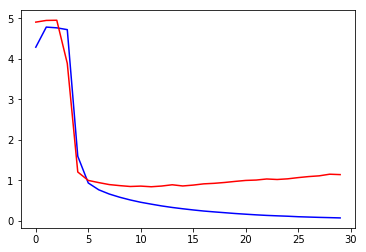

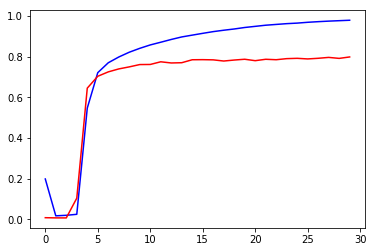

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [45]:
def save_network(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
save_network(model, run_name_acc)

## Predict

In [46]:
y_pred = model.predict_generator(test_gen, steps=steps_per_epoch_test)
print(y_pred.shape)

  20180331-163122
(12672, 128)


In [47]:
# 这里证明os.listdir()得到的图片名称list不正确
files = os.listdir(os.path.join(cwd, 'input', 'data_test', 'test'))
print(files[:10])

['8362.jpg', '4226.jpg', '12692.jpg', '4545.jpg', '5860.jpg', '1628.jpg', '6360.jpg', '11927.jpg', '10832.jpg', '12667.jpg']


In [48]:
# 这里证明ImageDataGenerator()得到的图片名称list才是正确
gen = ImageDataGenerator()
image_size = (299, 299)
test_generator  = gen.flow_from_directory(test_folder, image_size, shuffle=False, batch_size=batch_size)
print('test_generator')
print(len(test_generator.filenames))
print(test_generator.filenames[:10])

Found 12652 images belonging to 1 classes.
test_generator
12652
['test/1.jpg', 'test/10.jpg', 'test/100.jpg', 'test/1000.jpg', 'test/10000.jpg', 'test/10001.jpg', 'test/10002.jpg', 'test/10003.jpg', 'test/10004.jpg', 'test/10005.jpg']


In [49]:
%%time
max_indexes = np.argmax(y_pred, -1)
print(max_indexes.shape)

test_dict = {}
for pair in zip(test_generator.filenames, max_indexes):
    image_name, indx = pair[0], int(pair[1])
    image_name = image_name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print(pair[0], image_name, image_id, indx, indx+1, type(image_id), type(indx))
    test_dict[image_id] = indx + 1

#确认图片的id是否能与ImageDataGenerator()对应上
for name in test_generator.filenames[:10]:
    image_name = name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print('%s\t%s\t%s' % (name, image_id, test_dict[image_id]))

(12672,)
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 19.6 ms


In [50]:
display(sample_submission_csv.head(2))

,id,predicted
0,1,101
1,2,126


In [51]:
%%time
len_sample_submission_csv = len(sample_submission_csv)
print('len(len_sample_submission_csv)=%d' % len_sample_submission_csv)
count = 0
for i in range(len_sample_submission_csv):
    image_id = int(sample_submission_csv.iloc[i, 0])
    if image_id in test_dict:
        pred_label = test_dict[image_id]
#         print('%s\t%s' % (image_id, pred_label))
        sample_submission_csv.iloc[i, 1] = pred_label
    else:
#         print('%s\t%s' % (image_id, 20))
        sample_submission_csv.iloc[i, 1] = 20 # 属于20的类最多，所以全都设置成这个类，可能会比设置成其他得到的结果好
    count += 1
    if count % 1000 == 0:
        print(int(count/1000), end=' ')
display(sample_submission_csv.head(2))

len(len_sample_submission_csv)=12800
1 2 3 4 5 6 7 8 9 10 11 12 

,id,predicted
0,1,84
1,2,96


CPU times: user 11.5 s, sys: 0 ns, total: 11.5 s
Wall time: 11.3 s


In [52]:
print(list(set(sample_submission_csv['predicted'])))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]


In [53]:
pred_file = os.path.join(output_folder, 'pred_' + run_name_acc + '.csv')
sample_submission_csv.to_csv(pred_file, index=None)

In [54]:
print(run_name_acc)
print('Done !')

ic_furniture2018_Train-Predict_LSTM_20180401_184549_7964
Done !
